In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt

from DesignMat import Polynomial, Gaussian, Sigmoidal
from Regressor import LeastSquares

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data(func, sample_size, std, domain=[0, 1]):
    np.random.seed(1234)
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

**Revisit polynomial curve fitting problem** by using different basis functions

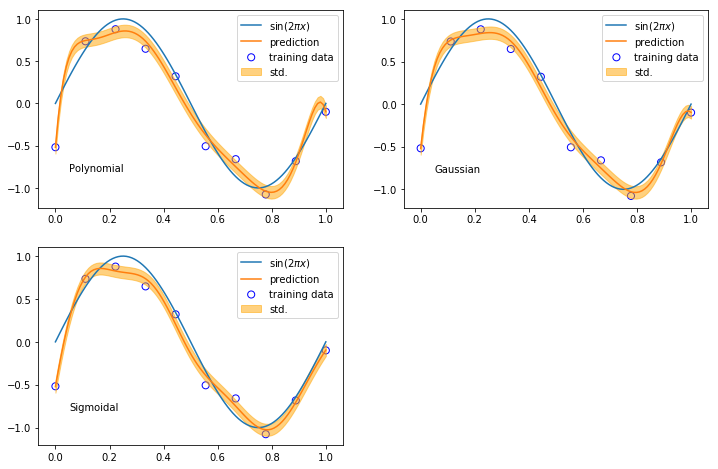

In [2]:
x_train, t_train = create_data(sinusoidal, 10, 0.25)

x_test = np.linspace(0, 1, 100)
t_test = sinusoidal(x_test)

basis_funcs = {'Polynomial': [8], 'Gaussian': [np.linspace(0, 1, 8), 0.1], 'Sigmoidal': [np.linspace(0, 1, 8), 10]}

fig = plt.figure(figsize=(12, 8))

for i, (key, value) in enumerate(basis_funcs.items()):
    
    phi_train = globals()[key](*value).dm(x_train)
    phi_test  = globals()[key](*value).dm(x_test)
    
    t, t_std = LeastSquares().fit(phi_train, t_train).predict_dist(phi_test)
    
    plt.subplot(2, 2, i+1)
    plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, t_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, t, label="prediction")
    plt.fill_between(x_test, t - t_std, t + t_std, color="orange", alpha=0.5, label="std.")
    plt.annotate("{}".format(key), xy=(0.05, -.8))
    plt.legend()
    
plt.show()